In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Importing the Data and Preprocessıng of the Data EDA

In [2]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML Assignments\STATISTICS\Random Forest\Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [6]:
#Creating a function that catagorize the income tax payers to risky and Good

def fraud_cheacker(x):
    if x<=30000:
        return 'Risky'
    else:
        return 'Good'

df['Group'] = df['Taxable.Income'].apply(fraud_cheacker)

df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Group
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [7]:
df.Group.value_counts()

Group
Good     476
Risky    124
Name: count, dtype: int64

In [8]:
#Creating a new data and applying the one hot encoding by using dummies
data = df.copy()

data = pd.get_dummies(data.iloc[:,0:6])
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,True,False,False,False,True,False,True
1,33700,134075,18,False,True,True,False,False,False,True
2,36925,160205,30,True,False,False,True,False,False,True
3,50190,193264,15,False,True,False,False,True,False,True
4,81002,27533,28,True,False,False,True,False,True,False


In [9]:
data.dtypes

Taxable.Income             int64
City.Population            int64
Work.Experience            int64
Undergrad_NO                bool
Undergrad_YES               bool
Marital.Status_Divorced     bool
Marital.Status_Married      bool
Marital.Status_Single       bool
Urban_NO                    bool
Urban_YES                   bool
dtype: object

In [10]:
# Changing bool columns to int


for columns_name in data.columns[0:10]:
    if data[columns_name].dtype == 'bool':
        data[columns_name] = data[columns_name].astype(int)


data.dtypes

Taxable.Income             int64
City.Population            int64
Work.Experience            int64
Undergrad_NO               int32
Undergrad_YES              int32
Marital.Status_Divorced    int32
Marital.Status_Married     int32
Marital.Status_Single      int32
Urban_NO                   int32
Urban_YES                  int32
dtype: object

In [11]:
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [12]:
data['Class'] = df.Group
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Class
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good


In [13]:
# Changing Target variable to numbers by using Label encoder

from sklearn.preprocessing import LabelEncoder
data['Class'] = LabelEncoder().fit_transform(data['Class'])
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Class
0,68833,50047,10,1,0,0,0,1,0,1,0
1,33700,134075,18,0,1,1,0,0,0,1,0
2,36925,160205,30,1,0,0,1,0,0,1,0
3,50190,193264,15,0,1,0,0,1,0,1,0
4,81002,27533,28,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0
596,69967,55369,2,0,1,1,0,0,0,1,0
597,47334,154058,0,1,0,1,0,0,0,1,0
598,98592,180083,17,0,1,0,1,0,1,0,0


C:\Users\mobin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


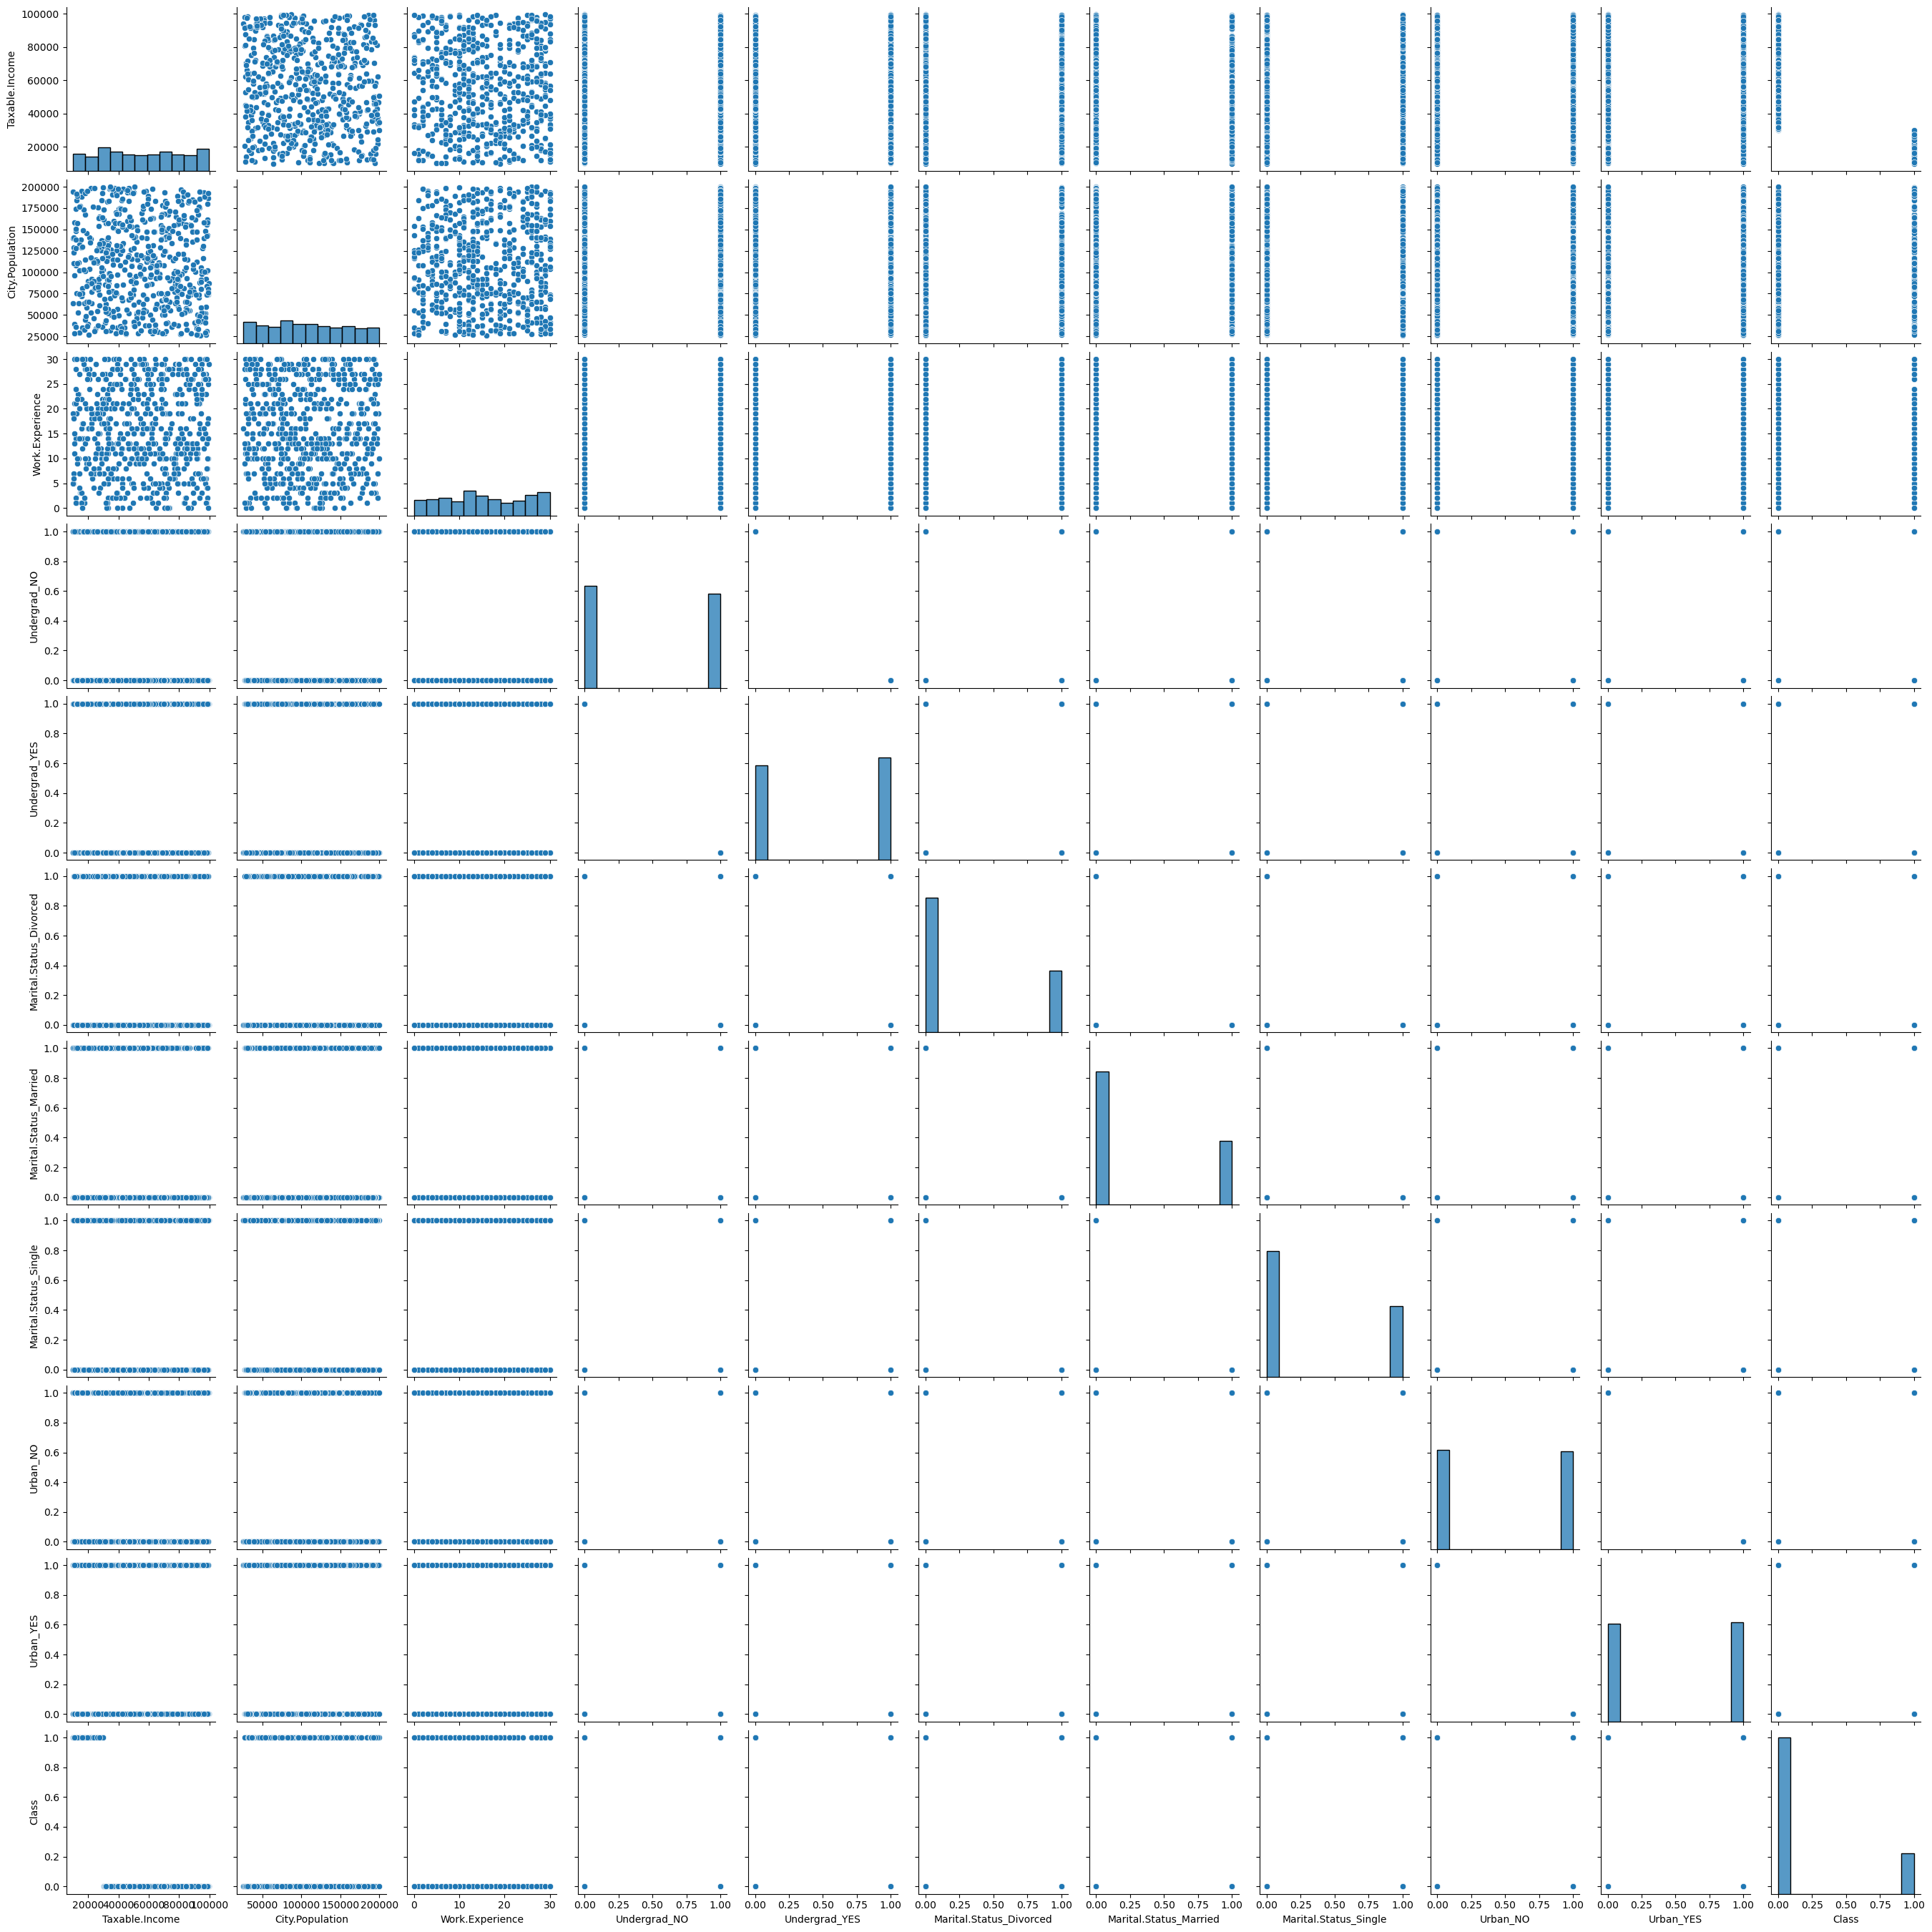

In [26]:
sns.pairplot(data)

In [27]:
data.corr()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Class
Taxable.Income,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628,-0.688725
City.Population,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098,0.012225
Work.Experience,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559,-0.001972
Undergrad_NO,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267,-0.012523
Undergrad_YES,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267,0.012523
Marital.Status_Divorced,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518,-0.027115
Marital.Status_Married,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771,0.043178
Marital.Status_Single,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014,-0.015820
Urban_NO,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000,-0.004830
Urban_YES,0.070628,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000,0.004830


## FEATURE ENGINEERING

In [16]:
# Now we are going to select those features which can help to predict our model

X = data.drop('Class' , axis = 1)
Y = data['Class']


from sklearn.feature_selection import SelectKBest, f_classif

k_best = SelectKBest(score_func=f_classif, k = 8)
k_fit = k_best.fit(X,Y)
k_features = k_fit.transform(X)
k_features


array([[ 68833,  50047,      1, ...,      0,      1,      1],
       [ 33700, 134075,      0, ...,      0,      0,      1],
       [ 36925, 160205,      1, ...,      1,      0,      1],
       ...,
       [ 47334, 154058,      1, ...,      0,      0,      1],
       [ 98592, 180083,      0, ...,      1,      0,      0],
       [ 96519, 158137,      1, ...,      0,      0,      0]], dtype=int64)

In [17]:
k_fit.get_feature_names_out()

array(['Taxable.Income', 'City.Population', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES'],
      dtype=object)

In [23]:
# Creating the Data of Features that contributes more to our Model 

list = ['Taxable.Income', 'City.Population', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']

for col_name in X.columns:
    if col_name not in list:
        X = X.drop(col_name, axis=1)

In [24]:
X

,Taxable.Income,City.Population,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,1,0,0,0,1,1
1,33700,134075,0,1,1,0,0,1
2,36925,160205,1,0,0,1,0,1
3,50190,193264,0,1,0,0,1,1
4,81002,27533,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
595,76340,39492,0,1,1,0,0,1
596,69967,55369,0,1,1,0,0,1
597,47334,154058,1,0,1,0,0,1
598,98592,180083,0,1,0,1,0,0


## MODEL BUILDING     

In [30]:
# By using Kfold method we are training and tessting the data

kfold = KFold(n_splits=10, random_state=10, shuffle=True)
model = RandomForestClassifier(n_estimators=200,random_state=15,max_depth=None,min_samples_leaf=3)
cro_score = cross_val_score(model,X,Y,cv = kfold)
print(cro_score)
print(cro_score.mean())


[1.         1.         1.         1.         1.         1.
 0.98333333 1.         1.         1.        ]
0.9983333333333334


## By Using Grid Search CV to Find Best Parameters for the Model

In [31]:
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestClassifier(random_state=15, n_jobs=-1)
params = {
    'max_depth' : [2,3,4,5,None],
    'min_samples_leaf': [3,5,7,10,20],
    'n_estimators': [50,100,200,300,500],
    'max_features': ['sqrt' , 'log2' , None]
}


#initalizing our grid search method

grid_search = GridSearchCV(estimator=model_rf,
                           param_grid=params,
                           cv=kfold,
                           n_jobs=-1,
                           verbose=10,
                           scoring='accuracy'
                          )

grid_search.fit(X,Y)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=15),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [3, 5, 7, 10, 20],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='accuracy', verbose=10)

In [32]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 50}
0.9983333333333334
